### ICA-PCA Combined Approach to Denoising and Dimensionality

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fastparquet, pyarrow
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA, PCA

In [3]:
df = pd.read_csv('working_data.csv')

##### Splitting Data by Activity Type

In [4]:
def activity_df(activity):
    return pd.DataFrame(df[df['expert_consensus'] == activity]).reset_index().drop(columns = 'index')

seizure_df = activity_df('Seizure')
lpd_df = activity_df('LPD')
gpd_df = activity_df('GPD')
lrda_df = activity_df('LRDA')
grda_df = activity_df('GRDA')
other_df = activity_df('Other')

##### Functions to Scale, Perform ICA and PCA, and Plot Signals

In [5]:
def scale(df, row):
    eeg = pd.read_parquet('train_eegs/{}.parquet'.format(df['eeg_id'][row]), engine = 'pyarrow')
    first_row = int(df['eeg_label_offset_seconds'][row] * 200)
    last_row = int(first_row + 10000)
    sub_eeg = eeg[first_row: last_row]
    electrodes = sub_eeg.columns
    scaler = StandardScaler()
    sub_eeg = scaler.fit_transform(sub_eeg)
    sub_eeg = pd.DataFrame(sub_eeg, columns = electrodes)
    return sub_eeg

def activity_signal_plots(sub_eegs, activities, electrodes, h, w):
    fig, axs = plt.subplots(len(electrodes), len(sub_eegs))
    fig.set_figheight(h)
    fig.set_figwidth(w)
    fig.tight_layout()
    for i in range(len(electrodes)):
        if len(sub_eegs) == 1:
            axs[i].plot(sub_eegs[0][electrodes[i]])
            axs[i].set_title('{}_{}'.format(activities[0], electrodes[i]))
        else:
            for j in range(len(sub_eegs)):
                axs[i][j].plot(sub_eegs[j][electrodes[i]])
                if len(activities) > 1:
                    axs[i][j].set_title('{}_{}'.format(activities[j], electrodes[i]))
                else:
                    axs[i][j].set_title('{}_{}'.format(activities[0], electrodes[i]))
    plt.show()

def ica_function(sub_eeg, group):
    sub_eeg = sub_eeg[group]
    ica = FastICA(max_iter = 500, random_state = 32)
    sub_eeg = ica.fit_transform(sub_eeg)
    sub_eeg = pd.DataFrame(sub_eeg, columns = ['component_{}'.format(i) for i in range(len(group))])
    return sub_eeg
    
def pca_function(sub_eeg, group, n):
    sub_eeg = sub_eeg[group]
    pca = PCA(n_components = n, random_state = 42)
    sub_eeg = pca.fit_transform(sub_eeg)
    variances = pca.explained_variance_ratio_
    sub_eeg = pd.DataFrame(sub_eeg, columns = ['component_{}'.format(i) for i in range(n)])
    return sub_eeg, variances

##### Left/Right Electrode Split

In [6]:
left = ['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz']
right = ['Fz', 'Cz', 'Pz', 'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2']

In [7]:
indexes = [i for i in range(df.shape[0])]
random_indexes = np.random.choice(indexes, size = 1000, replace = False)

In [9]:
variance_list = []
for i in random_indexes:
    ica_eeg = ica_function(scale(df, i), left)
    cols = ica_eeg.columns
    pca_eeg, variances = pca_function(ica_eeg, cols, 8)
    variance_list.append(variances)

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [10]:
np.asarray(variance_list).shape

(1000, 8)

In [11]:
variances = pd.DataFrame(np.asarray(variance_list), columns = ['component_{}'.format(i) for i in range(1, 9)])

In [26]:
variance_means = []
for col in variances.columns:
    mean = variances[col].mean()
    variance_means.append(mean)

In [27]:
variance_means = np.asarray(variance_means)

In [28]:
variance_means = pd.DataFrame(variance_means)

In [29]:
variance_means.index = ['{} Component(s)'.format(i) for i in range(1, 9)]

In [30]:
variance_means.columns = ['Variance Explained']

In [33]:
variance_means = variance_means.transpose()

In [34]:
variance_means

,Variance Explained
1 Component(s),0.090910
2 Component(s),0.090909
3 Component(s),0.090909
4 Component(s),0.090909
5 Component(s),0.090909
6 Component(s),0.090909
7 Component(s),0.090909
8 Component(s),0.090909


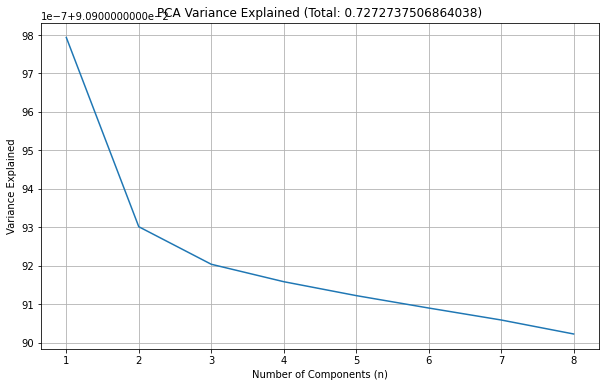

In [19]:
n_range = range(1, 9)
plt.figure(figsize = (10, 6))
plt.plot(n_range, variance_means)
plt.title('PCA Variance Explained (Total: {})'.format(variance_means.sum()))
plt.xlabel('Number of Components (n)')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

### Explained Variance Ratio to Evaluate PCA after ICA

In [9]:
seizure_indexes = [i for i in range(seizure_df.shape[0])]
other_indexes = [i for i in range(other_df.shape[0])]
gpd_indexes = [i for i in range(gpd_df.shape[0])]
grda_indexes = [i for i in range(grda_df.shape[0])]
lrda_indexes = [i for i in range(lrda_df.shape[0])]
lpd_indexes = [i for i in range(lpd_df.shape[0])]

In [10]:
df['expert_consensus'].value_counts(normalize = True)

expert_consensus
Seizure    0.209216
Other      0.189732
GPD        0.157017
GRDA       0.155822
LRDA       0.146853
LPD        0.141360
Name: proportion, dtype: float64

In [11]:
s_count_norm = df['expert_consensus'].value_counts(normalize = True)[0]
o_count_norm = df['expert_consensus'].value_counts(normalize = True)[1]
gpd_count_norm = df['expert_consensus'].value_counts(normalize = True)[2]
grda_count_norm = df['expert_consensus'].value_counts(normalize = True)[3]
lrda_count_norm = df['expert_consensus'].value_counts(normalize = True)[4]
lpd_count_norm = df['expert_consensus'].value_counts(normalize = True)[5]

norm_list = [s_count_norm, o_count_norm, gpd_count_norm, grda_count_norm,
             lrda_count_norm, lpd_count_norm]
activity_counts_1000 = []
for norm in norm_list:
    activity_count = norm * 1000
    activity_counts_1000.append(activity_count)
    
activity_counts_1000

[209.21557739201816,
 189.73176561481444,
 157.01731089596564,
 155.82220719959437,
 146.85289359955576,
 141.3602452980516]

In [12]:
seizure_norm1000 = np.random.choice(seizure_indexes, size = 209, replace = False)
other_norm1000 = np.random.choice(other_indexes, size = 190, replace = False)
gpd_norm1000 = np.random.choice(gpd_indexes, size = 157, replace = False)
grda_norm1000 = np.random.choice(grda_indexes, size = 156, replace = False)
lrda_norm1000 = np.random.choice(lrda_indexes, size = 147, replace = False)
lpd_norm1000 = np.random.choice(lpd_indexes, size = 141, replace = False)

In [13]:
left = ['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz']
right = ['Fz', 'Cz', 'Pz', 'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2']

### ICA-PCA More Components  
  
PCA components don't explain as much variance in the data after ICA, so more components are required to get a good total variance explained number.  
  
It might be best to do PCA before ICA. It's possible I'll be reducing a total of 19 scalp electrodes to 16 principal components which isn't very good.

In [14]:
evr6 = []
evr7 = []
evr8 = []

In [15]:
for i in seizure_norm1000:
    seizure_eeg = scale(seizure_df, i)
    seizure_left = ica_function(seizure_eeg, left)
    seizure_right = ica_function(seizure_eeg, right)
    cols = seizure_left.columns
    
    seizure_l6components, seizure_evrl6 = pca_function(seizure_left, cols, 6)
    seizure_r6components, seizure_evrr6 = pca_function(seizure_right, cols, 6)
    evr6.append(seizure_evrl6.sum())
    evr6.append(seizure_evrr6.sum())
    
    seizure_l7components, seizure_evrl7 = pca_function(seizure_left, cols, 7)
    seizure_r7components, seizure_evrr7 = pca_function(seizure_right, cols, 7)
    evr7.append(seizure_evrl7.sum())
    evr7.append(seizure_evrr7.sum())
    
    seizure_l8components, seizure_evrl8 = pca_function(seizure_left, cols, 8)
    seizure_r8components, seizure_evrr8 = pca_function(seizure_right, cols, 8)
    evr8.append(seizure_evrl8.sum())
    evr8.append(seizure_evrr8.sum())

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

In [16]:
for i in lpd_norm1000:
    lpd_eeg = scale(lpd_df, i)
    lpd_left = ica_function(lpd_eeg, left)
    lpd_right = ica_function(lpd_eeg, right)
    cols = lpd_left.columns
    
    lpd_l6components, lpd_evrl6 = pca_function(lpd_left, cols, 6)
    lpd_r6components, lpd_evrr6 = pca_function(lpd_right, cols, 6)
    evr6.append(lpd_evrl6.sum())
    evr6.append(lpd_evrr6.sum())
    
    lpd_l7components, lpd_evrl7 = pca_function(lpd_left, cols, 7)
    lpd_r7components, lpd_evrr7 = pca_function(lpd_right, cols, 7)
    evr7.append(lpd_evrl7.sum())
    evr7.append(lpd_evrr7.sum())
    
    lpd_l8components, lpd_evrl8 = pca_function(lpd_left, cols, 8)
    lpd_r8components, lpd_evrr8 = pca_function(lpd_right, cols, 8)
    evr8.append(lpd_evrl8.sum())
    evr8.append(lpd_evrr8.sum())

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

In [17]:
for i in gpd_norm1000:
    gpd_eeg = scale(gpd_df, i)
    gpd_left = ica_function(gpd_eeg, left)
    gpd_right = ica_function(gpd_eeg, right)
    cols = gpd_left.columns
    
    gpd_l6components, gpd_evrl6 = pca_function(gpd_left, cols, 6)
    gpd_r6components, gpd_evrr6 = pca_function(gpd_right, cols, 6)
    evr6.append(gpd_evrl6.sum())
    evr6.append(gpd_evrr6.sum())
    
    gpd_l7components, gpd_evrl7 = pca_function(gpd_left, cols, 7)
    gpd_r7components, gpd_evrr7 = pca_function(gpd_right, cols, 7)
    evr7.append(gpd_evrl7.sum())
    evr7.append(gpd_evrr7.sum())
    
    gpd_l8components, gpd_evrl8 = pca_function(gpd_left, cols, 8)
    gpd_r8components, gpd_evrr8 = pca_function(gpd_right, cols, 8)
    evr8.append(gpd_evrl8.sum())
    evr8.append(gpd_evrr8.sum())

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

In [18]:
for i in lrda_norm1000:
    lrda_eeg = scale(lrda_df, i)
    lrda_left = ica_function(lrda_eeg, left)
    lrda_right = ica_function(lrda_eeg, right)
    cols = lrda_left.columns
    
    lrda_l6components, lrda_evrl6 = pca_function(lrda_left, cols, 6)
    lrda_r6components, lrda_evrr6 = pca_function(lrda_right, cols, 6)
    evr6.append(lrda_evrl6.sum())
    evr6.append(lrda_evrr6.sum())
    
    lrda_l7components, lrda_evrl7 = pca_function(lrda_left, cols, 7)
    lrda_r7components, lrda_evrr7 = pca_function(lrda_right, cols, 7)
    evr7.append(lrda_evrl7.sum())
    evr7.append(lrda_evrr7.sum())
    
    lrda_l8components, lrda_evrl8 = pca_function(lrda_left, cols, 8)
    lrda_r8components, lrda_evrr8 = pca_function(lrda_right, cols, 8)
    evr8.append(lrda_evrl8.sum())
    evr8.append(lrda_evrr8.sum())

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

In [19]:
for i in grda_norm1000:
    grda_eeg = scale(grda_df, i)
    grda_left = ica_function(grda_eeg, left)
    grda_right = ica_function(grda_eeg, right)
    cols = grda_left.columns
    
    grda_l6components, grda_evrl6 = pca_function(grda_left, cols, 6)
    grda_r6components, grda_evrr6 = pca_function(grda_right, cols, 6)
    evr6.append(grda_evrl6.sum())
    evr6.append(grda_evrr6.sum())
    
    grda_l7components, grda_evrl7 = pca_function(grda_left, cols, 7)
    grda_r7components, grda_evrr7 = pca_function(grda_right, cols, 7)
    evr7.append(grda_evrl7.sum())
    evr7.append(grda_evrr7.sum())
    
    grda_l8components, grda_evrl8 = pca_function(grda_left, cols, 8)
    grda_r8components, grda_evrr8 = pca_function(grda_right, cols, 8)
    evr8.append(grda_evrl8.sum())
    evr8.append(grda_evrr8.sum())

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

In [20]:
for i in other_norm1000:
    other_eeg = scale(other_df, i)
    other_left = ica_function(other_eeg, left)
    other_right = ica_function(other_eeg, right)
    cols = other_left.columns
    
    other_l6components, other_evrl6 = pca_function(other_left, cols, 6)
    other_r6components, other_evrr6 = pca_function(other_right, cols, 6)
    evr6.append(other_evrl6.sum())
    evr6.append(other_evrr6.sum())
    
    other_l7components, other_evrl7 = pca_function(other_left, cols, 7)
    other_r7components, other_evrr7 = pca_function(other_right, cols, 7)
    evr7.append(other_evrl7.sum())
    evr7.append(other_evrr7.sum())
    
    other_l8components, other_evrl8 = pca_function(other_left, cols, 8)
    other_r8components, other_evrr8 = pca_function(other_right, cols, 8)
    evr8.append(other_evrl8.sum())
    evr8.append(other_evrr8.sum())

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider 

In [21]:
evr6_left, evr6_right = [], []
evr7_left, evr7_right = [], []
evr8_left, evr8_right = [], []

for i in range(2000):
    if (i + 1) % 2 == 0:
        evr6_right.append(evr6[i])
        evr7_right.append(evr7[i])
        evr8_right.append(evr8[i])
    else:
        evr6_left.append(evr6[i])
        evr7_left.append(evr7[i])
        evr8_left.append(evr8[i])

In [22]:
print('Variance Explained N = 6 Mean: {}, Median: {}'.format(np.mean(np.asarray(evr6)),
                                                             np.median(np.asarray(evr6))))
print('Variance Explained N = 7 Mean: {}, Median: {}'.format(np.mean(np.asarray(evr7)),
                                                             np.median(np.asarray(evr7))))
print('Variance Explained N = 8 Mean: {}, Median: {}'.format(np.mean(np.asarray(evr8)),
                                                             np.median(np.asarray(evr8))))

Variance Explained N = 6 Mean: 0.5454558595705684, Median: 0.5454551630734523
Variance Explained N = 7 Mean: 0.6363649173953211, Median: 0.6363642216194344
Variance Explained N = 8 Mean: 0.7272739368366924, Median: 0.7272732499678827


In [23]:
print('Left Variance Explained N = 6 Mean: {}, Median: {}'.format(np.mean(np.asarray(evr6_left)),
                                                                  np.median(np.asarray(evr6_left))))
print('Right Variance Explained N = 6 Mean: {}, Median: {}'.format(np.mean(np.asarray(evr6_right)),
                                                                  np.median(np.asarray(evr6_right))))

Left Variance Explained N = 6 Mean: 0.5454558929085743, Median: 0.5454551668950993
Right Variance Explained N = 6 Mean: 0.5454558262325625, Median: 0.5454551532324392


In [24]:
print('Left Variance Explained N = 7 Mean: {}, Median: {}'.format(np.mean(np.asarray(evr7_left)),
                                                                  np.median(np.asarray(evr7_left))))
print('Right Variance Explained N = 7 Mean: {}, Median: {}'.format(np.mean(np.asarray(evr7_right)),
                                                                  np.median(np.asarray(evr7_right))))

Left Variance Explained N = 7 Mean: 0.6363649509912755, Median: 0.6363642277176638
Right Variance Explained N = 7 Mean: 0.6363648837993667, Median: 0.6363642157684807


In [25]:
print('Left Variance Explained N = 8 Mean: {}, Median: {}'.format(np.mean(np.asarray(evr8_left)),
                                                                  np.median(np.asarray(evr8_left))))
print('Right Variance Explained N = 8 Mean: {}, Median: {}'.format(np.mean(np.asarray(evr8_right)),
                                                                  np.median(np.asarray(evr8_right))))

Left Variance Explained N = 8 Mean: 0.7272739696625861, Median: 0.7272732515384389
Right Variance Explained N = 8 Mean: 0.7272739040107988, Median: 0.7272732459994208
